In [12]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/ava.csv")

In [13]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407


In [14]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print("\nMissing values per row:")
#print(df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
user                 0
first_date           0
last_date            0
cycle_number         0
cycle_length         0
date                 0
cycle_day            0
skin_temperature    16
hr                  16
br                   9
dtype: int64


### work only without NaNs

In [15]:
df = df.dropna(axis = 0)

In [16]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
dtype: int64


In [17]:
print("number of users: ", len(df["user"].unique()))
print("number of cycles: ", len(df.groupby(["user","cycle_number"]).describe()))

number of users:  180
number of cycles:  792


data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

### normalisation of features -> df2

In [26]:
#### cycle index for all women
df2 = df.reset_index()
#create a new column for indexing all cycles
df2["cycle_index"] = df2.index

#normalize features hr, br, and skin_temperature
#create new columns for normalized values
df2["br_norm"] = df2.index
df2["hr_norm"] = df2.index
df2["st_norm"] = df2.index

cycle_index = []
br_norm = []
hr_norm = []
st_norm = []

i = 0
for user in df2.user.unique():
    for cycle in df2[df2.user == user]["cycle_number"].unique():
        #print("user: ", user)
        #print("cycle: ", cycle)
        #print(i)
        for j in range(len(df2[(df2.user == user)&(df2.cycle_number == cycle)])):
            #print("j:",j)
            cycle_index.append(i)
            

            
        i +=1
        
        df_temp = df2[(df2.user == user)&(df2.cycle_number == cycle)][["skin_temperature", "hr", "br"]]
            #print(df_temp)
        st_norm_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].mean())\
                                       /df_temp["skin_temperature"].std()
        hr_norm_temp = (df_temp["hr"]-df_temp["hr"].mean())\
                                        /df_temp["hr"].std()
        br_norm_temp = (df_temp["br"]-df_temp["br"].mean())\
                                        /df_temp["br"].std()
        
        ## append normalized values to list
        st_norm.extend(st_norm_temp.values.tolist())
        br_norm.extend(br_norm_temp.values.tolist())
        hr_norm.extend(hr_norm_temp.values.tolist())
print(len(cycle_index))
print(len(df2))
print(len(hr_norm))

#fill columns with list values
df2["cycle_index"] = cycle_index
df2["br_norm"] = st_norm
df2["hr_norm"] = br_norm
df2["st_norm"] = hr_norm

print(df2[df2.cycle_index ==110])

20145
20145
20145
      index  user  first_date   last_date  cycle_number  cycle_length  \
2996   2999   436  2017-03-08  2017-04-03             6            27   

            date  cycle_day  skin_temperature        hr         br  \
2996  2017-03-08          1         36.244316  50.39832  12.818016   

      cycle_index  br_norm  hr_norm  st_norm  
2996          110      NaN      NaN      NaN  


In [27]:
df2.columns

Index(['index', 'user', 'first_date', 'last_date', 'cycle_number',
       'cycle_length', 'date', 'cycle_day', 'skin_temperature', 'hr', 'br',
       'cycle_index', 'br_norm', 'hr_norm', 'st_norm'],
      dtype='object')

In [28]:

print("Missing values per column:")
print(df2.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             5
hr_norm             5
st_norm             5
dtype: int64


In [29]:
df2[df2["br_norm"].isnull()]

,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm
2996,2999,436,2017-03-08,2017-04-03,6,27,2017-03-08,1,36.244316,50.398320,12.818016,110,NaN,NaN,NaN
10347,10360,2787,2017-10-13,2017-11-08,10,27,2017-10-13,1,35.599526,55.105193,14.443848,404,NaN,NaN,NaN
11707,11720,3981,2017-06-26,2017-07-24,6,29,2017-06-26,1,36.357652,64.328439,18.591413,461,NaN,NaN,NaN
17542,17556,5214,2017-08-09,2017-09-05,5,28,2017-08-09,1,35.126522,61.177419,14.909896,689,NaN,NaN,NaN
18884,18898,12560,2017-10-04,2017-10-31,2,28,2017-10-04,1,36.189796,54.384408,11.183912,745,NaN,NaN,NaN


unique cycle lengths:  [11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]
number of unique cycle lengths:  59

regular cycle lengths between 20 and 36 days



<Container object of 59 artists>

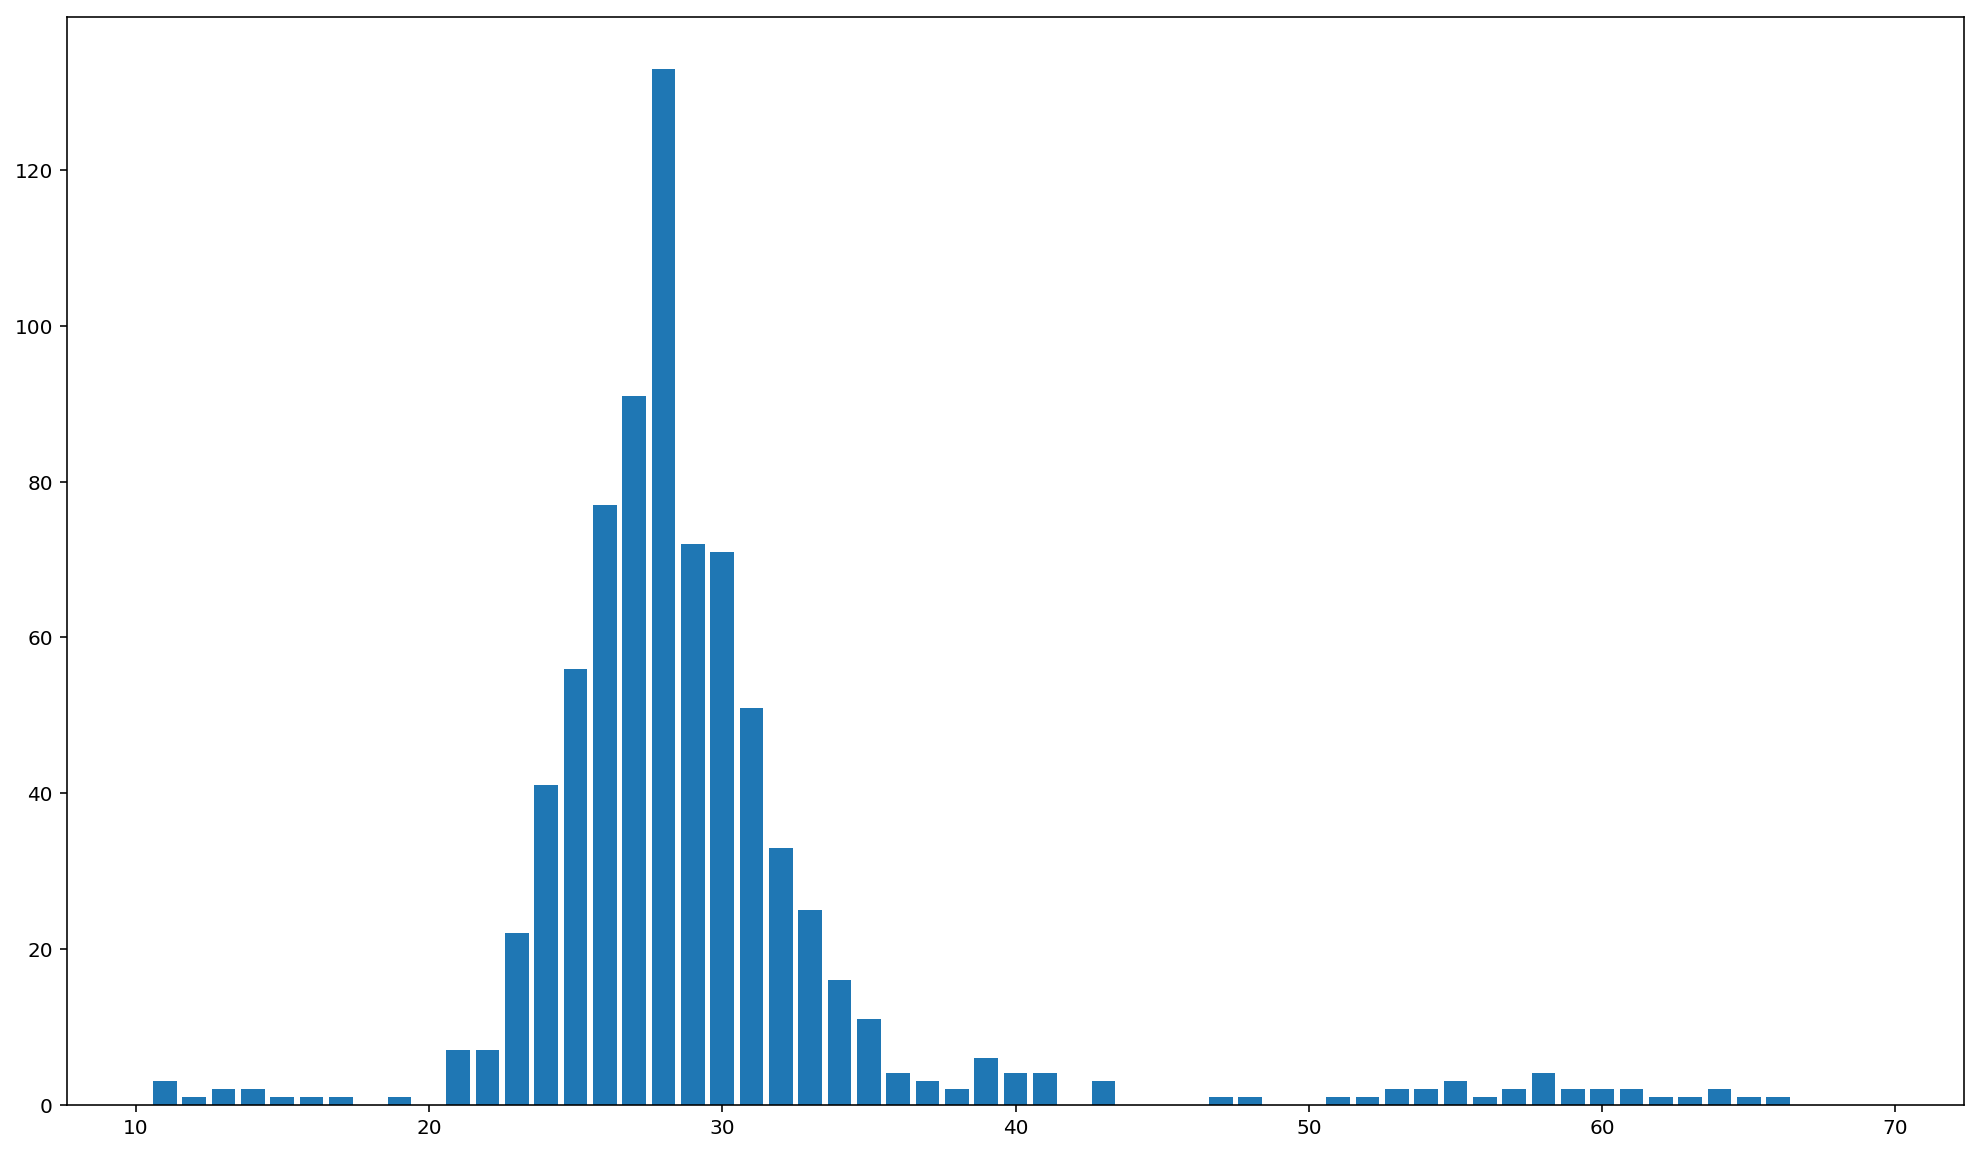

In [30]:
print("unique cycle lengths: ", sorted(df["cycle_length"].unique()))
print("number of unique cycle lengths: ", len(df["cycle_length"].unique()))
print()
print("regular cycle lengths between 20 and 36 days")
print()
### barplot
values = []
keys = []
length = sorted(df2["cycle_length"].unique())[0]
for l in sorted(df2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(length, len(df2[df2.cycle_length == length].cycle_index.unique())))
    values.append(len(df2[df2.cycle_length == length].cycle_index.unique()))
    keys.append(length)
    length+=1
    ## barplot!!!
plt.figure(figsize = (17,10))
plt.bar(keys, values)

### Dataframe with cycles of regular length only

In [32]:
df_regLen = df2.loc[(df2.cycle_length >= 20)&(df2.cycle_length <= 36)]
print("unique cycle lengths in regular df: ", sorted(df_regLen["cycle_length"].unique()))
print("number of cycles in regular df: ", len(df_regLen.groupby(["user","cycle_number"]).describe()))

unique cycle lengths in regular df:  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
number of cycles in regular df:  717


### Dataframe with cycles of regular length only and without missing days

(if cycle_length value > count of cycle_days in one cycle)

In [33]:
groupby_cycles = df_regLen.groupby(["user","cycle_number"]).describe()

In [34]:
groupby_cycles = pd.DataFrame(groupby_cycles[["cycle_day", "cycle_length"]]).reset_index()

In [35]:
print("number of incomplete cycles (with missing days): ", len(groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]]))

number of incomplete cycles (with missing days):  545


In [36]:
print("number of complete cycles (without missing days): ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print("number users with complete cycles: ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print()
print()


number of complete cycles (without missing days):  172
number users with complete cycles:  172


In [37]:
index_completeCycles = groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]].index
gold_df = groupby_cycles.iloc[index_completeCycles][["user", "cycle_number"]]

# user and users cycles with complete data and regular cycle length
print(gold_df.user.values)
print(len(gold_df.user.unique()))
print()
print(gold_df)

[  360   360   406   406   406   406   406   406   407   407   407   407
   407   411   411   411   411   411   417   417   417   417   417   418
   418   418   418   423   423   423   423   427   427   427   436   436
   447   466   466   466   487   500   500   500   500   513   513   513
   513   513   827   827   827   827   827   912   912   917   939   939
   950   950  1316  1320  2559  2559  2560  2741  2741  2746  2746  2760
  2760  2760  2767  2787  2787  2787  2787  2787  3775  3775  3775  3994
  3994  4001  4025  4039  4039  4039  4055  4057  4070  4070  4070  4070
  4070  4070  4070  4070  4569  4569  4569  4569  4570  4577  4587  4587
  4872  4874  4874  4881  4881  4881  4919  4925  4925  4927  4927  4930
  4930  4940  4940  4940  4940  4942  4942  4942  4942  5184  5200  5200
  5203  5206  5206  5213  5214  5214  5214  5448  5448  5448  5533  5539
  5539  5547  5547  5556  5559  5559  5559  5560  5792  7959  8976 13849
 14026 14027 14027 14027 14032 14032 14057 14059 14

In [38]:
# time series data frame with complete cycles and regular length
gold = pd.DataFrame()
for user in np.unique(gold_df.user.values):
    for cycle in gold_df[gold_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        gold = gold.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [39]:
print("Missing values per column:")
print(gold.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
dtype: int64


In [40]:
gold.to_csv("Data/data_clean.csv")

In [41]:
gold2 = gold.reset_index()
gold2["cycle_index"] = gold2.index
cycle_index = []
i = 0
for user in gold.user.unique():
    for cycle in gold2[gold2.user == user]["cycle_number"].unique():
        print("user: ", user)
        print("cycle: ", cycle)
        print(i)
        #print(len(gold2[(gold2.user == user)&(gold2.cycle_number == cycle)]))
        for j in range(len(gold2[(gold2.user == user)&(gold2.cycle_number == cycle)])):
            cycle_index.append(i)
        i +=1
#gold2.at[2]["user"] = 1
len(cycle_index)


# Set DataFrame column values based on other column values (h/t: @mlevkov)
#df.loc[(df['column1'] == some_value) & (df['column2'] == some_other_value), ['column_to_change']] = new_value

user:  360
cycle:  1
0
user:  360
cycle:  3
1
user:  406
cycle:  5
2
user:  406
cycle:  6
3
user:  406
cycle:  8
4
user:  406
cycle:  11
5
user:  406
cycle:  12
6
user:  406
cycle:  13
7
user:  407
cycle:  3
8
user:  407
cycle:  4
9
user:  407
cycle:  5
10
user:  407
cycle:  7
11
user:  407
cycle:  12
12
user:  411
cycle:  5
13
user:  411
cycle:  6
14
user:  411
cycle:  8
15
user:  411
cycle:  9
16
user:  411
cycle:  10
17
user:  417
cycle:  1
18
user:  417
cycle:  2
19
user:  417
cycle:  3
20
user:  417
cycle:  5
21
user:  417
cycle:  6
22
user:  418
cycle:  1
23
user:  418
cycle:  2
24
user:  418
cycle:  3
25
user:  418
cycle:  6
26
user:  423
cycle:  1
27
user:  423
cycle:  2
28
user:  423
cycle:  6
29
user:  423
cycle:  7
30
user:  427
cycle:  2
31
user:  427
cycle:  5
32
user:  427
cycle:  8
33
user:  436
cycle:  1
34
user:  436
cycle:  3
35
user:  447
cycle:  2
36
user:  466
cycle:  1
37
user:  466
cycle:  2
38
user:  466
cycle:  6
39
user:  487
cycle:  7
40
user:  500
cycle:  5


4811

In [43]:


print("Missing values per column:")
print(gold2.apply(num_missing, axis=0))
print()
print(len(gold2))
gold2["cycle_index"] = cycle_index
gold2.to_csv("Data/data_clean2.csv")

Missing values per column:
level_0             0
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
dtype: int64

4811


In [44]:
st_ = gold2[["cycle_day", "skin_temperature", "cycle_index"]]
hr_ = gold2[["cycle_day", "hr", "cycle_index"]]
br_ = gold2[["cycle_day", "br", "cycle_index"]]
st = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature").fillna(0)
hr = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr").fillna(0)
br = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br").fillna(0)

st.to_csv("Data/st.csv")
br.to_csv("Data/br.csv")
hr.to_csv("Data/hr.csv")



In [45]:
st_na = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature")
hr_na = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr")
br_na = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br")

st_na.to_csv("Data/st_na.csv")
br_na.to_csv("Data/br_na.csv")
hr_na.to_csv("Data/hr_na.csv")

## Feature engineering

In [46]:
br_max = gold.groupby(["user","cycle_number"]).describe()["br"]["max"]
br_min = gold.groupby(["user","cycle_number"]).describe()["br"]["min"]

In [154]:
features = br_max

features = features.reset_index()
features = pd.DataFrame(features)
features["br_max"] = features["max"]
features = features.drop(["max"], axis = 1)
features["br_min"] = br_min.values


### Find all cycles with same length and choose randomly five to plot


21
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]



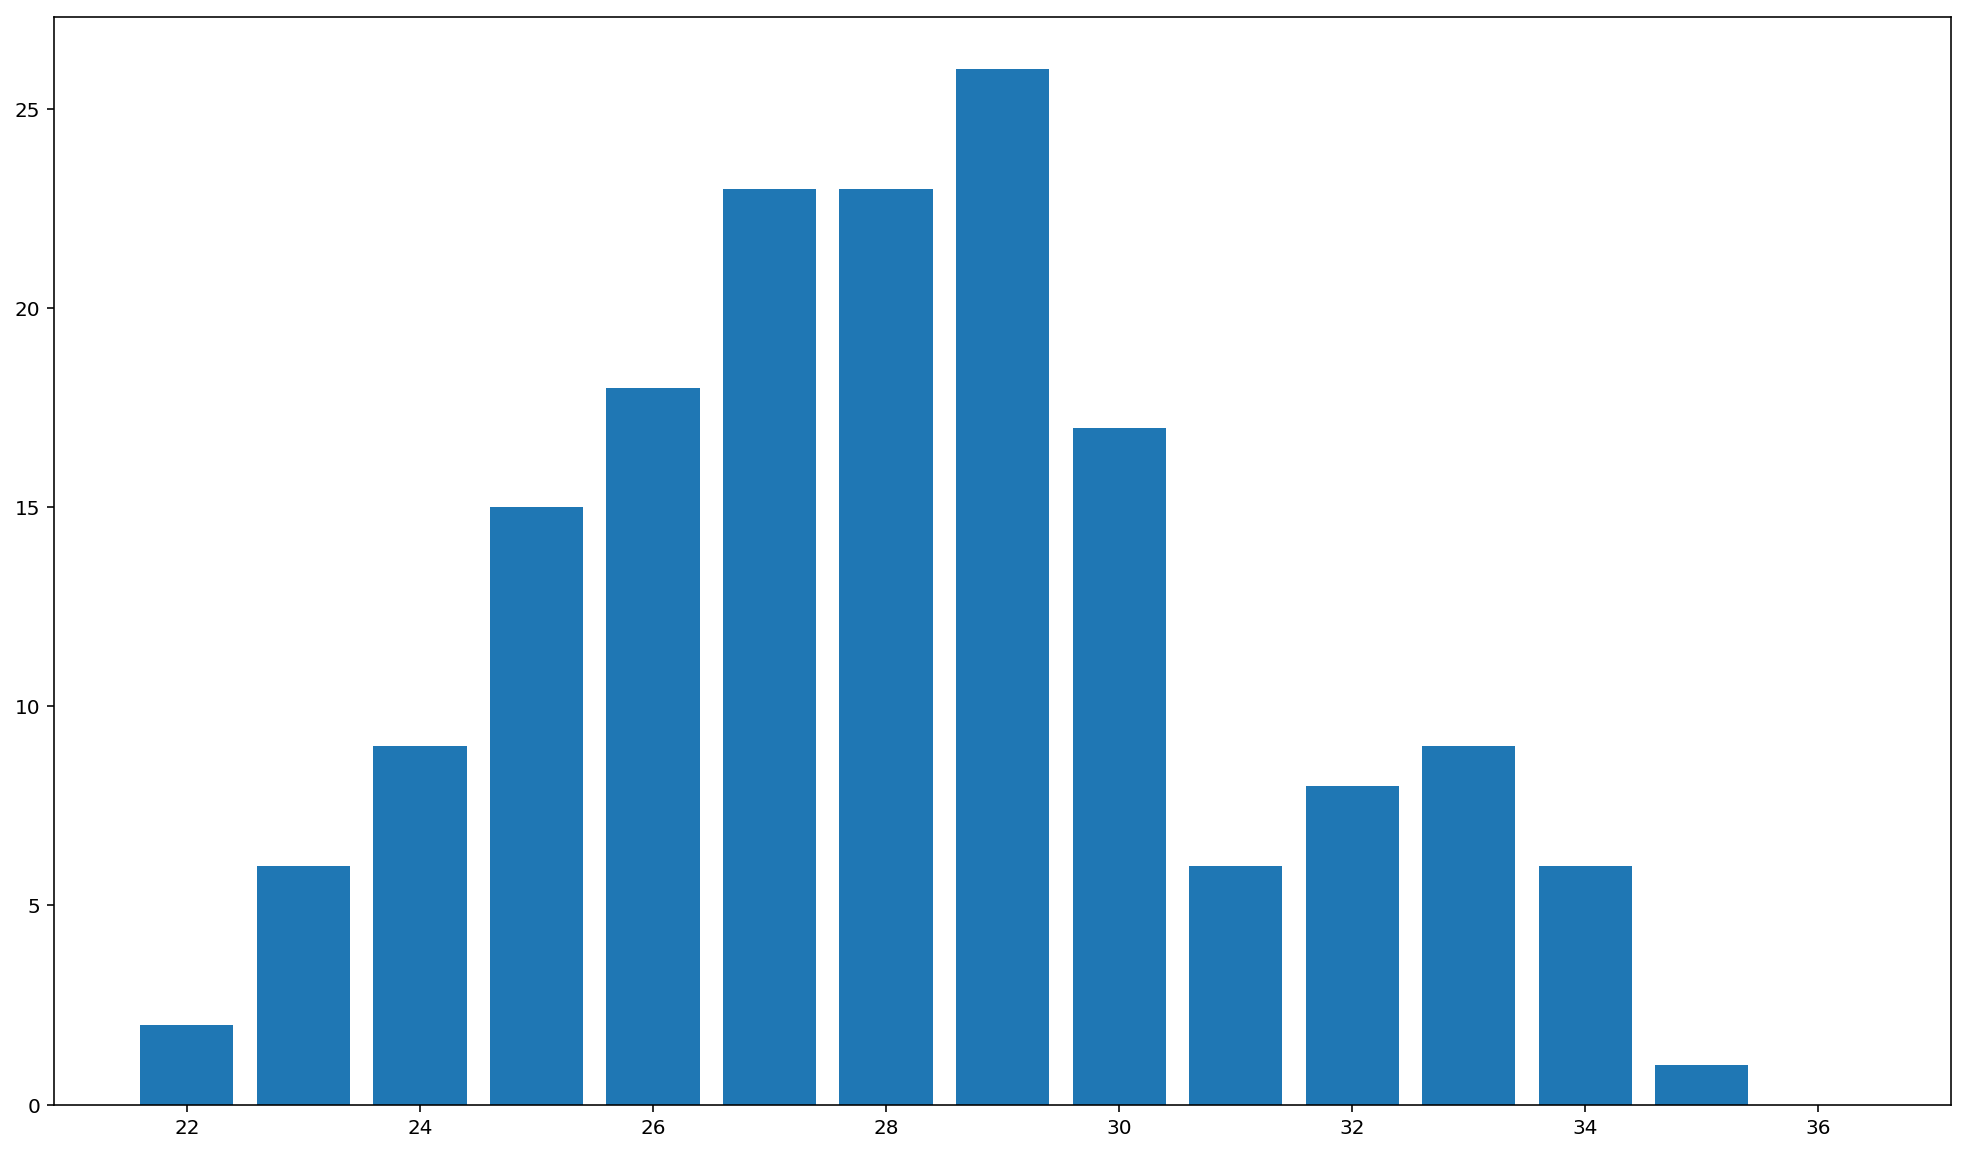

In [47]:
keys = []
values = []
length = sorted(gold2["cycle_length"].unique())[0]
print(length)
print(sorted(gold2["cycle_length"].unique()))
for l in sorted(gold2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(l, len(gold2[gold2.cycle_length == l].cycle_index.unique())))
    #print("length: ", l)
    #print("l: ", l)
    l+=1
    
    ## barplot!
    values.append(len(gold2[gold2.cycle_length == l].cycle_index.unique()))
    keys.append(l)

plt.figure(figsize = (17,10))
plt.bar(keys, values)
print()
#print(keys)
#print(values)

In [48]:
lShort = 24
lReg = 28
lLong = 33

short = gold2[gold2.cycle_length == lShort]
reg = gold2[gold2.cycle_length == lReg]
long = gold2[gold2.cycle_length == lLong]
print("number of short cycles: ", len(short.cycle_index.unique()))
print("number of regular cycles: ", len(reg.cycle_index.unique()))
print("number of long cycles: ", len(long.cycle_index.unique()))

number of short cycles:  9
number of regular cycles:  23
number of long cycles:  9


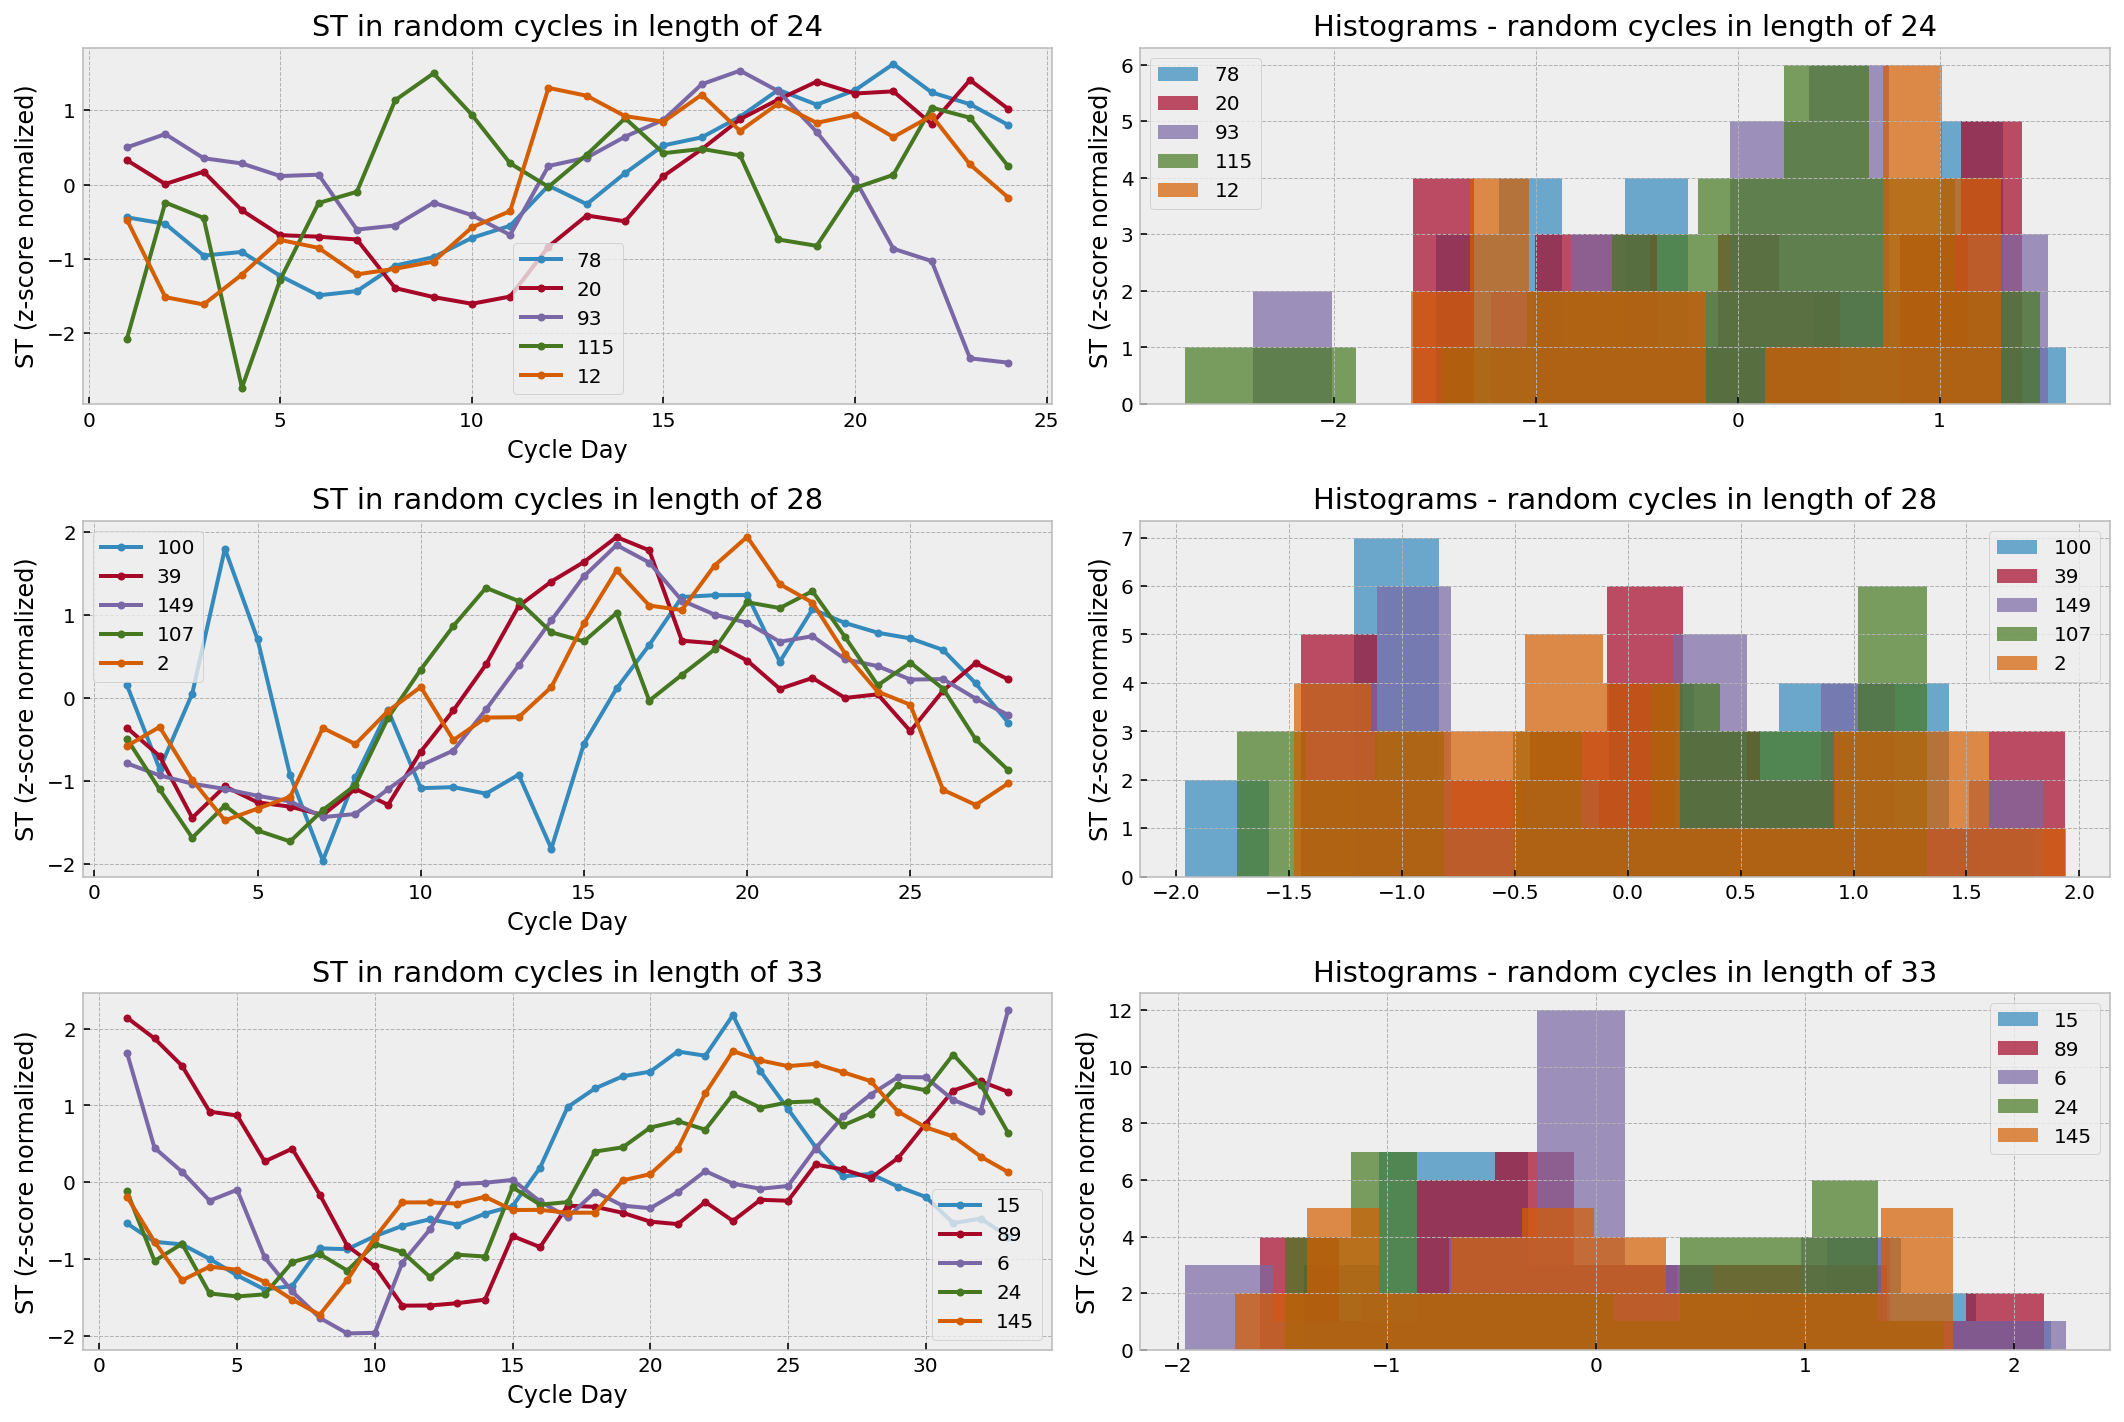

In [130]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "st_norm"

bins = 10
alpha = 0.7


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        plt.hist(x0, label = str(cycle_indexes[0]), bins = bins, alpha = alpha)
        plt.hist(x1, label = str(cycle_indexes[1]), bins = bins, alpha = alpha)
        plt.hist(x2,  label = str(cycle_indexes[2]), bins = bins, alpha = alpha)
        plt.hist(x3,  label = str(cycle_indexes[3]), bins = bins, alpha = alpha)
        plt.hist(x4,  label = str(cycle_indexes[4]), bins = bins, alpha = alpha)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))

        
        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/st_norm_diffLen_6.png", dpi = 600)

In [355]:
fig.savefig("Plots_DataCleaning/br_norm_diffLen_rand4.png", dpi = 600)

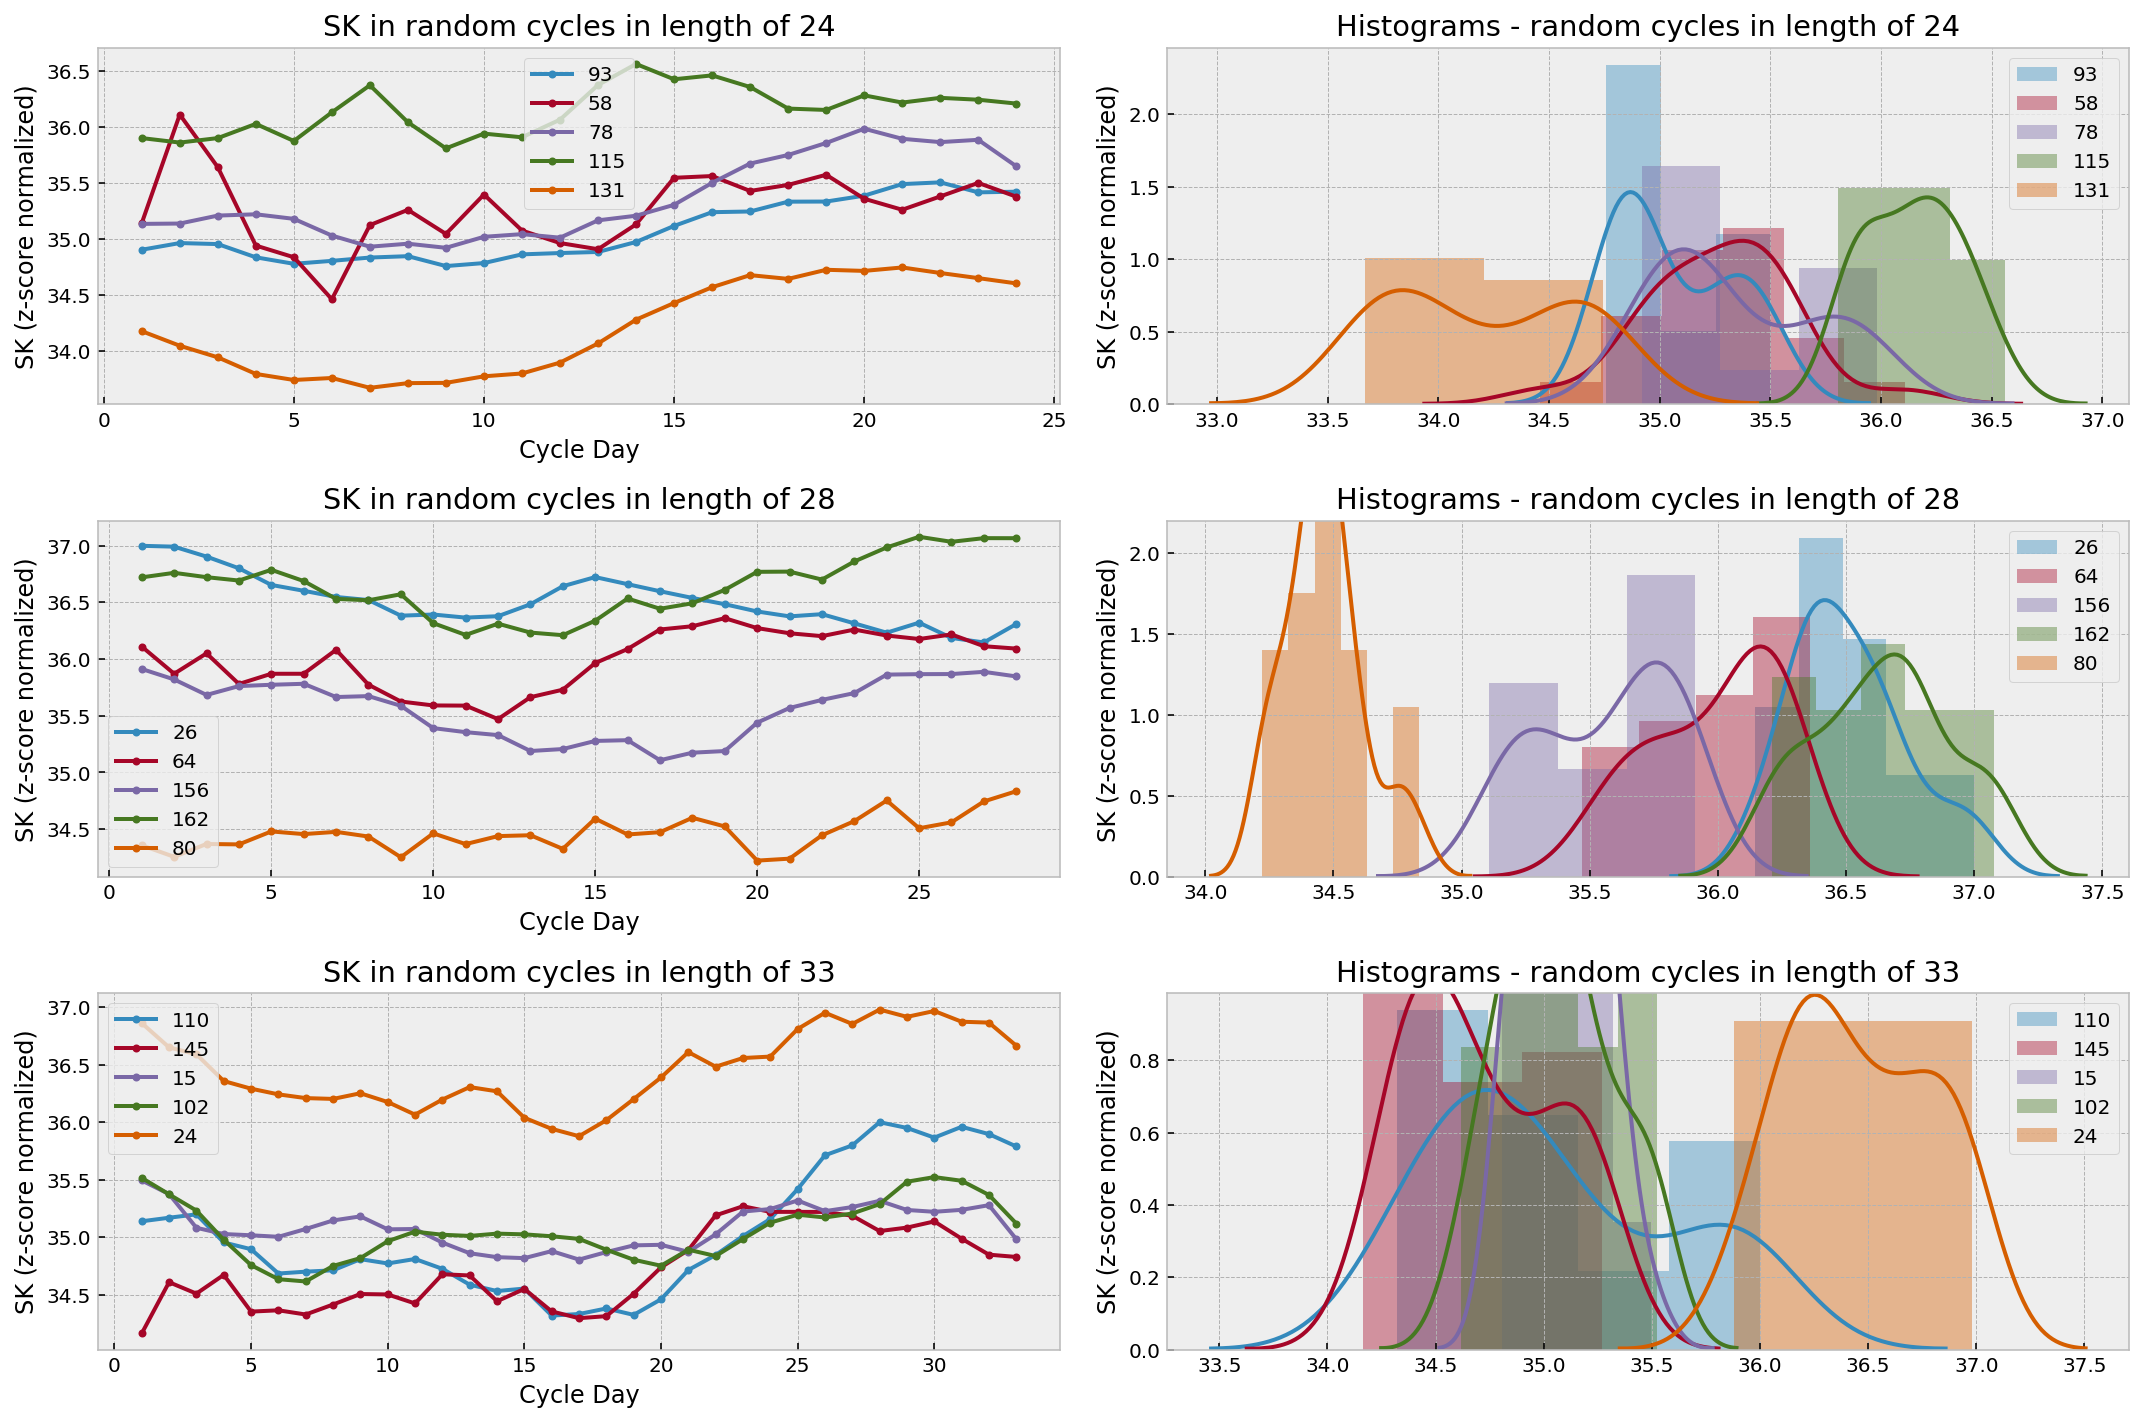

In [132]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "skin_temperature"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[0]))
        sns.distplot(x1, label = str(cycle_indexes[1]))
        sns.distplot(x2,  label = str(cycle_indexes[2]))
        sns.distplot(x3,  label = str(cycle_indexes[3]))
        sns.distplot(x4,  label = str(cycle_indexes[4]))
        plt.legend()



        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))

        
        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/st_norm_diffLen_6.png", dpi = 600)

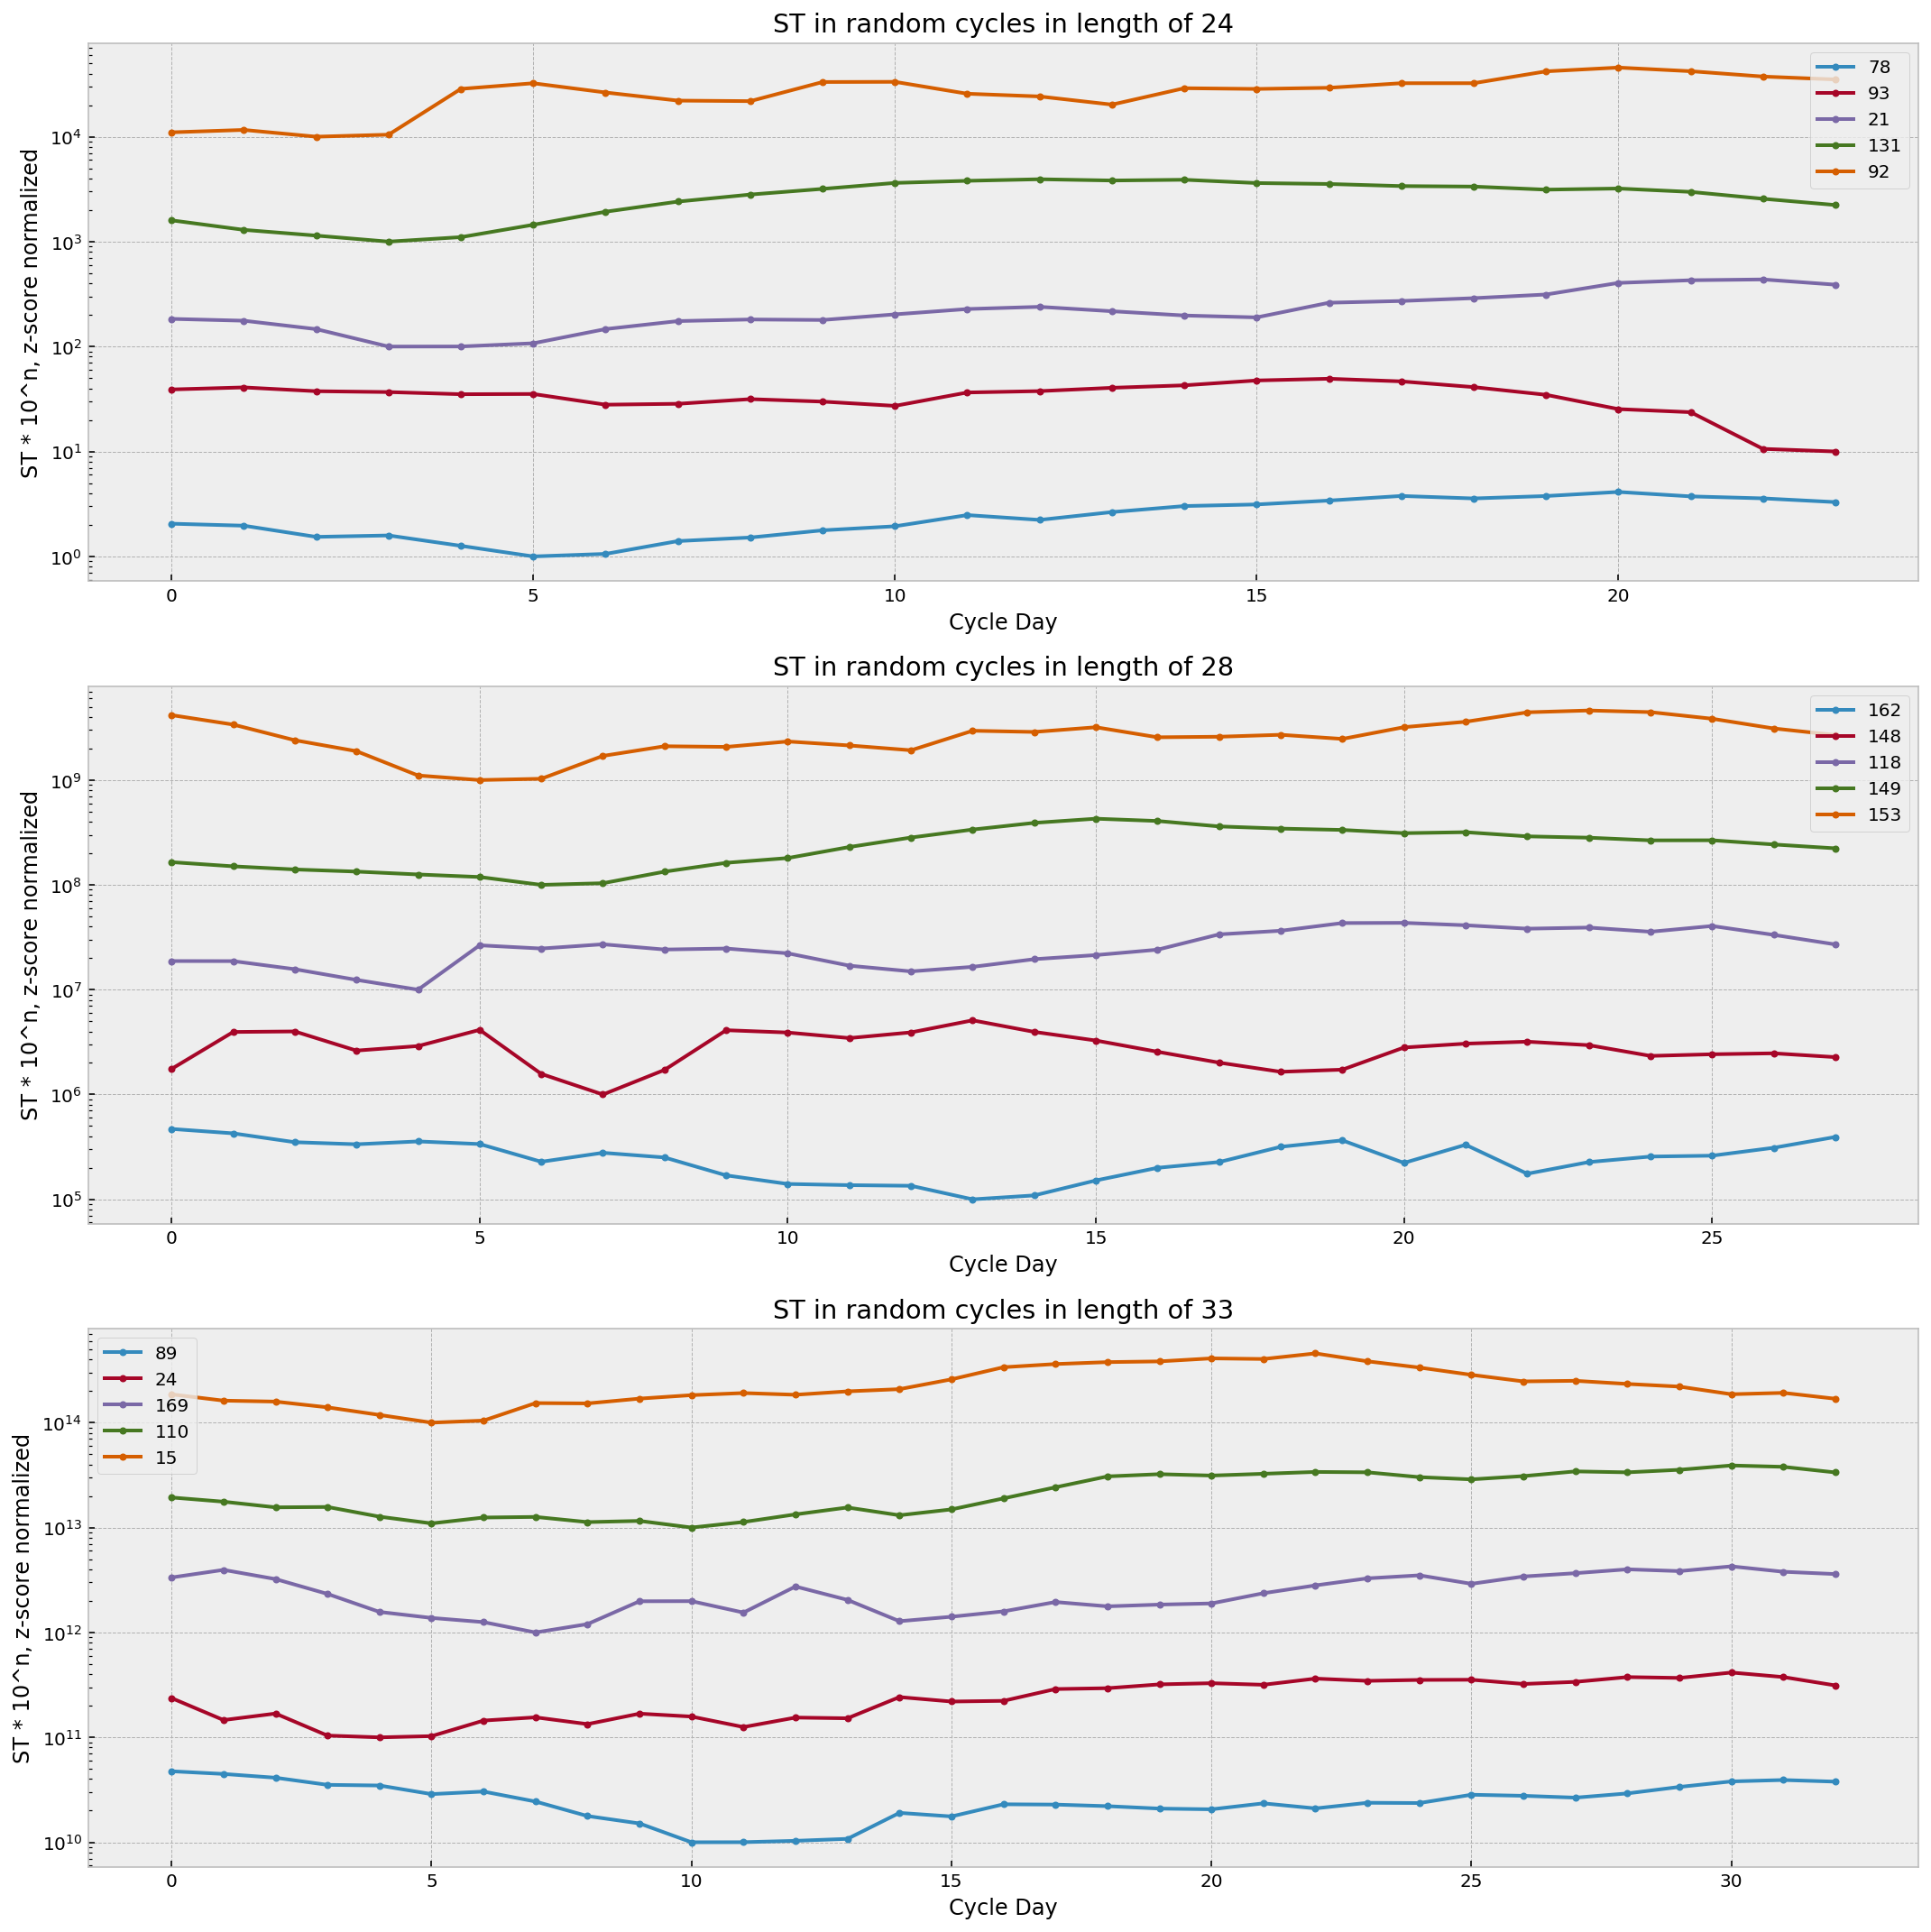

In [149]:
import random
lengths = [lShort, lReg, lLong]
i = 1
log_ = 1
feature = "st_norm"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,15))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,1,i)
        i+=1
        for cycle_index in cycle_indexes:
            feature_values = random_cycle[random_cycle.cycle_index == cycle_index][feature].values
            #print("feature values")
            #print(feature_values)
            f_min = feature_values.min()
            #print("f_min", f_min)
            feature_values = (feature_values - f_min + 1)*log_
            #print("feature values after log", feature_values)
            plt.semilogy(range(len(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"])),feature_values,linestyle='-' ,marker = ".", label = cycle_index)
            plt.yscale("log")
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
            log_*=10
        plt.xlabel('Cycle Day')
        plt.ylabel('{} * 10^n, z-score normalized'.format(feature[:2].upper()))
        
plt.tight_layout()

In [125]:
from sklearn.metrics.pairwise import euclidean_distances
length = 29
cycles = gold2[gold2.cycle_length == length]
indexes = cycles.cycle_index.unique()
X29 = []
for index in indexes:
    X29.append(cycles[cycles.cycle_index == index]["hr_norm"].values.tolist())
    #print(random_cycle.cycle_index.unique())
    #index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
    #print(random_cycle.cycle_index.unique()[random_index])
    #cycle_indexes = random_cycle.cycle_index.unique()[random_index]


cycles.to_csv("Data/X29.csv")

# distance between rows of X
#euclidean_distances(X, X)

In [128]:
st_ = cycles[["cycle_day", "skin_temperature", "cycle_index"]]
hr_ = cycles[["cycle_day", "hr", "cycle_index"]]
br_ = cycles[["cycle_day", "br", "cycle_index"]]

st_29 = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature")
hr_29 = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr")
br_29 = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br")

st_29.to_csv("Data/st_29.csv")
br_29.to_csv("Data/br_29.csv")
hr_29.to_csv("Data/hr_29.csv")

In [129]:
from scipy.spatial.distance import euclidean
euclidean(X29[1], X29[2])

3.0672022424581358